# Visualizing FordGoBike Data
# January 2018
## by Shenghao Wu

## Investigation Overview

In this dataset analysis, I analysis the trend of rent record of bicycle rent also the relationship between user type, time and rent record. 

## Dataset Overview

Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_cleaned = pd.read_csv('fordgo_master_clean.csv')
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_time_weekday,start_time_hour,end_time_hour,duration_min
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,Wed,22,19,1254
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,Wed,16,15,1423
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,Wed,14,10,1192
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,Wed,14,7,1017
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,Wed,19,6,666


## Ford GoBike Usage by Hour
From the graph we can see that Ford GoBike bicycle rent reaches peak when it is 8 am and 17 pm, so I guess the most part of users are people who using bike go to school or work.



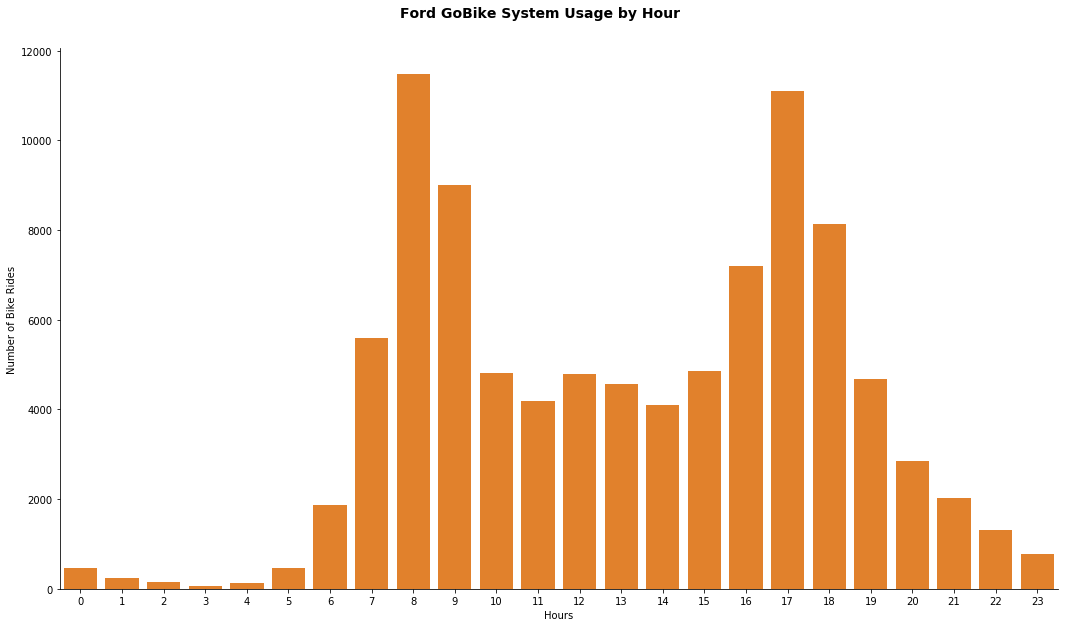

In [3]:
# Hourly usage of the Ford Go Bike System


graph = sb.catplot(data = df_cleaned, x='start_time_hour', kind='count', color = sb.color_palette()[1], height = 8.27,  aspect = 14.70/8.27)

graph.set_axis_labels('Hours', 'Number of Bike Rides')


graph.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=14, fontweight='bold');

##  Ford GoBike Trip Duration in Minutes

Graph shows that most of the trips durate between 3-9 minutes, we can know that most of people use Ford GoBike to travel a relative short distance.

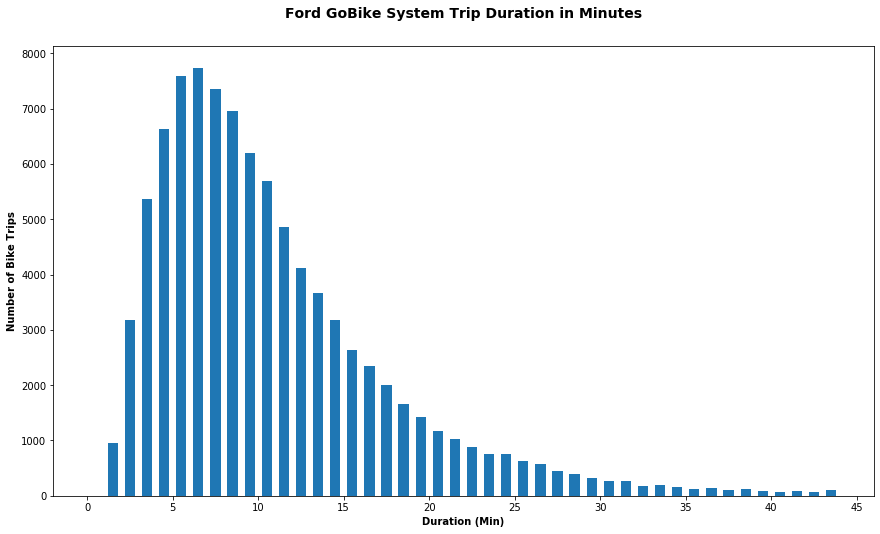

In [4]:
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]
plt.figure(figsize=[14.70, 8.27])
plt.hist(data = df_cleaned, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
#sb.distplot(df_cleaned['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Duration (Min)',fontsize = 10, weight = "bold")
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips',fontsize = 10, weight = "bold");

## Ford GoBike System Trends by User Type

Subscribers are the most part of whole users, the subscriber users drop dramatically on Saturday and Sunday. While customers users will increase during Saturday and Sunday. 

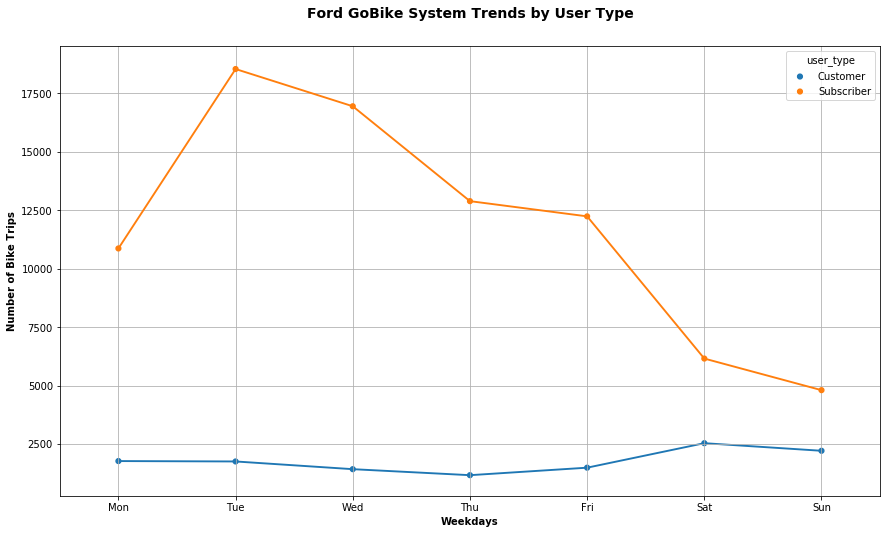

In [5]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday

plt.figure(figsize=[14.70, 8.27])
df_cleaned_user_week = df_cleaned.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Weekdays',fontsize = 10, weight = "bold")
plt.ylabel('Number of Bike Trips',fontsize = 10, weight = "bold");
plt.grid()

## Ford GoBike System - Start Time vs. Weekday by User Type

Customers use the bike sharing system more often on weekends, whilte Subscribers primarily use the bikes on weekdays.¶

Customers: During weekdays, most bike rides occur between 2-5pm. During weeknds, most bike rides occur between 11am and 3pm, peaking on Saturdays around 3pm.

Subscribers: During weekdays, most bike rides occur around 8-9am and 4-6pm. During weekends, there is a significant drop in the number of rented bikes.

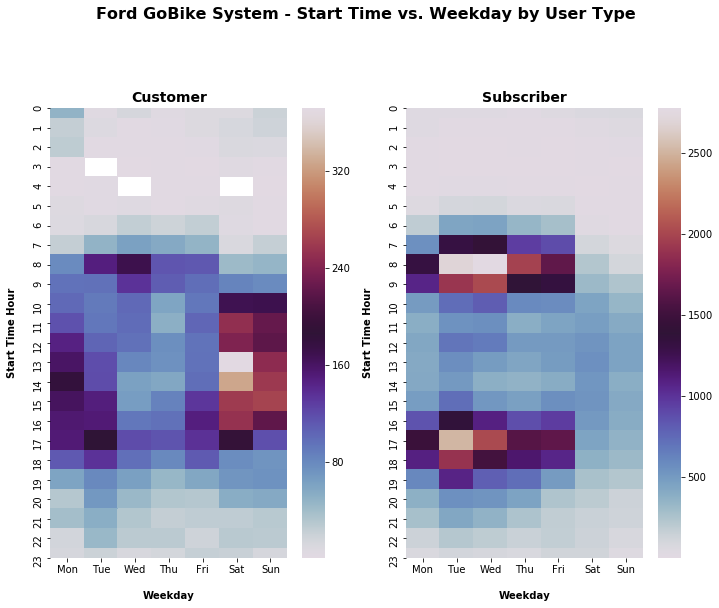

In [6]:
# Weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_cleaned['start_time_weekday'] = pd.Categorical(df_cleaned['start_time_weekday'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

plt.figure(figsize=[11.69, 8.27]);

# Heatmap - Customers
plt.subplot(1, 2, 1)
df_customer = df_cleaned.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
sb.heatmap(df_customer, cmap = 'twilight')

plt.title('Customer', y=1.05, fontsize = 14, weight = "bold")
plt.xlabel('Weekday', labelpad = 16, fontsize = 10, weight = "bold")
plt.ylabel('Start Time Hour',  labelpad = 16, fontsize = 10, weight = "bold")

# Heatmap - Subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_cleaned.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
sb.heatmap(df_subscriber, cmap = 'twilight')

plt.title("Subscriber", y=1.05, fontsize = 14, weight = "bold")
plt.xlabel('Weekday', labelpad = 16, fontsize = 10, weight = "bold")
plt.ylabel('Start Time Hour', labelpad = 16, fontsize = 10, weight = "bold");

plt.suptitle('Ford GoBike System - Start Time vs. Weekday by User Type', y = 1.05, fontsize = 16, fontweight = 'bold');

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle